In [1]:
from ast import If
import json
import os
import glob
import numpy as np
import playerData

files = []
playersArray = []
numNiveles = 4
nivel = -1
muertesPorNivel = np.zeros(numNiveles) #esto mide la suma de todas las muertes hechas por todos los jugadores?¿
saltosPorNivel = np.zeros(numNiveles)  #esto mide la suma de todos los saltos hechos por todos los jugadores?¿
numArchivos = 0


def Process(f):
    Lines = f.readlines()
    count = 0
    # For each line process one event
    events = []
    for line in Lines:
        count += 1
        events.append(json.loads(line))
    return events

# def Clean(f):
#     session_start = []
#     for i in range(0, f.readlines, 1):
#         line = f.readline[i]   

def ReadFiles():
    #List of files in folder
    for filename in glob.glob('**/*.json'):
        with open(filename) as f: # open files in readonly mode
            fName = f.name
            fName = "".join([ch for ch in fName if ch.isdigit()])   # getONLY the numbers in the name
            file = str(fName), Process(f)
            files.append(file)
            player = playerData.Player(numNiveles)
            playersArray.append(player)
            global numArchivos
            numArchivos += 1



A partir de ahora en la variable *files* tenemos todos los archivos, y en cada archivo, los eventos separados en formato **json**

In [2]:
def SessionStart(e,player):
    ID = e["sesion"]
    player.setID(ID)
def SessionEnd(e,player):
    player.end()
def LevelStart(e,player):
    global nivel
    nivel = e["nivel"] -3 #Los niveles estan codificados como nivel 3, 4, 5 y 6, asi que les resto esto para que se guarden como 0,1,2, y 3.

    #print(player.hasLevelBeenCompleted(nivel), " level: ", nivel, " completos: ", player.levelsCompleted)
    if (not player.hasLevelBeenCompleted(nivel)) :
        player.resetLevelInfo(nivel)

def LevelEnd(e, player):
    player.lvlEnd()

def Pause(e,player):
    t = e["tiempo"]
    player.pause(t)

def Unpause(e,player):
    t = e["tiempo"]
    player.pause(t)

def Death(e, player):
    muertesPorNivel[nivel] += 1
    player.death(nivel)

def Collision(e):
    print("-------COLLISION NOT IMPLEMENTED--------")


def Jump(e,player):
    saltosPorNivel[nivel] += 1
    player.jump(nivel)

def PlayerPosition(e,player):
    pos = e["x"], e["y"]
    player.addToPath(pos, nivel)

In [3]:
def ProcessEvent(e,actualPlayer):
     nombre = e["nombre"]
     player = playersArray[actualPlayer] #algunos eventos usaran al jugador y otros no



     if nombre == "LEVEL_START":
          LevelStart(e,player)

     elif nombre == "SESSION_START":
          SessionStart(e,player)
          
     elif nombre == "SESSION_END": #descomentar para leer informes individuales
          SessionEnd(e,player)

     if (player.hasLevelBeenCompleted(nivel)): 
          return

     if nombre == "LEVEL_END":
          LevelEnd(e, player)


     elif nombre == "PAUSE":
          Pause(e, player)

     elif nombre == "UNPAUSE":
          Unpause(e, player)

     elif nombre == "DEATH":
          Death(e,player)

     # elif nombre == "COLLISION":
     #     Collision(e)

     elif nombre == "JUMP":
          Jump(e,player)

     elif nombre == "PLAYER_POSITION":
          PlayerPosition(e,player)


     #print(nivel,":",nombre)




In [4]:

def ProcessFiles():
    ReadFiles()
    actualPlayer = -1 #iterador para añadir datos de jugador
    for f in files:
        actualPlayer+=1
        print("Processing player ", actualPlayer)
        for e in f[1]:
            ProcessEvent(e,actualPlayer)
    
    #print("------------------------------------------")
    #print("Media de saltos por jugador en cada nivel:",saltosPorNivel/np.size(playersArray))
    #print("Media de muertes por jugador en cada nivel:",muertesPorNivel/np.size(playersArray))


ProcessFiles()

Processing player  0
INFORME JUGADOR  1030424204065505273
Jumps:  [11. 37. 17. 37.]
Deaths:  [0. 0. 0. 0.]
Tiempo en pausa:  0
---------------------------------------------
Processing player  1
INFORME JUGADOR  1060054125199479874
Jumps:  [ 16. 104.  27.  35.]
Deaths:  [0. 2. 0. 0.]
Tiempo en pausa:  1.7711868286132812
---------------------------------------------
Processing player  2
INFORME JUGADOR  1454797195216275149
Jumps:  [ 20. 155.  25.  46.]
Deaths:  [0. 4. 0. 0.]
Tiempo en pausa:  0
---------------------------------------------
Processing player  3
INFORME JUGADOR  1482842417835807299
Jumps:  [38. 76. 54.  0.]
Deaths:  [0. 2. 0. 0.]
Tiempo en pausa:  9.493377685546875
---------------------------------------------
Processing player  4
INFORME JUGADOR  150124433152065388
Jumps:  [14. 36. 22. 35.]
Deaths:  [0. 0. 0. 0.]
Tiempo en pausa:  0
---------------------------------------------
Processing player  5
INFORME JUGADOR  1908151240582397456
Jumps:  [16. 88. 36. 45.]
Deaths:  [0

c:\Users\David\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\David\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


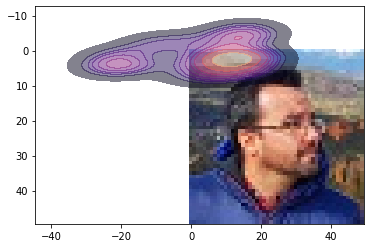

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.misc as sci
import imageio
from PIL import Image

im = imageio.imread("guille.jpg")
plt.imshow(im)
#Create the heatmap
kde = sns.kdeplot(
        map(lambda x: x[0],  playersArray[0].paths[3]),
        map(lambda x: x[1],  playersArray[0].paths[3]),
        shade = True,
        shade_lowest=False,
        alpha=.5,
        n_levels=10,
        cmap = 'magma'
)

plt.show()